<a href="https://colab.research.google.com/github/muajnstu/Implementation-of-Active-Learning-Method-in-Regression-Model/blob/main/Implementing_Active_Learning_on_various_experimental_settings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# importing basic libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, mutual_info_regression, f_regression, RFE
import shap
import xgboost as xgb
# machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# model tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Load The Data

In [ ]:
# load the data
df = pd.read_csv('https://raw.githubusercontent.com/muajnstu/ML-Datasets/main/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Categorical Feature Distribution

<ipython-input-4-28c14131c454>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


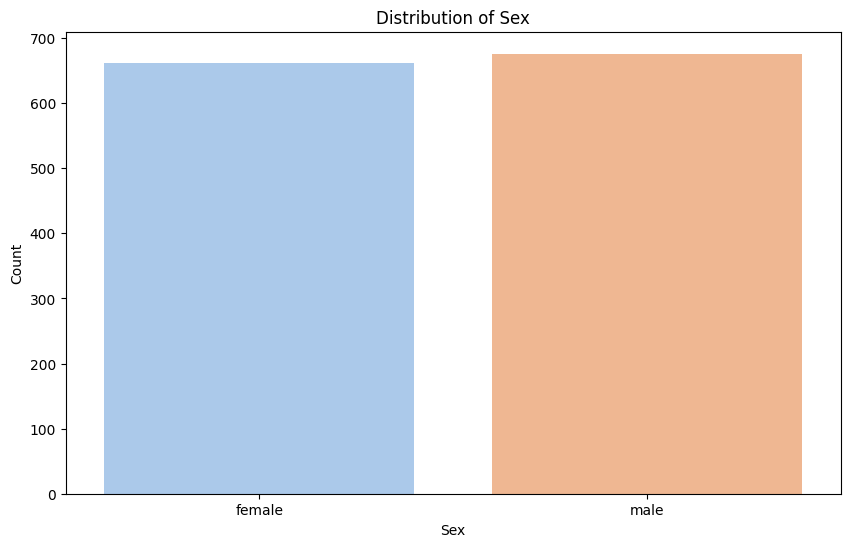

In [ ]:
# plotting the distribution of the 'sex' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

<ipython-input-5-d7ea79e9e946>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='pastel')


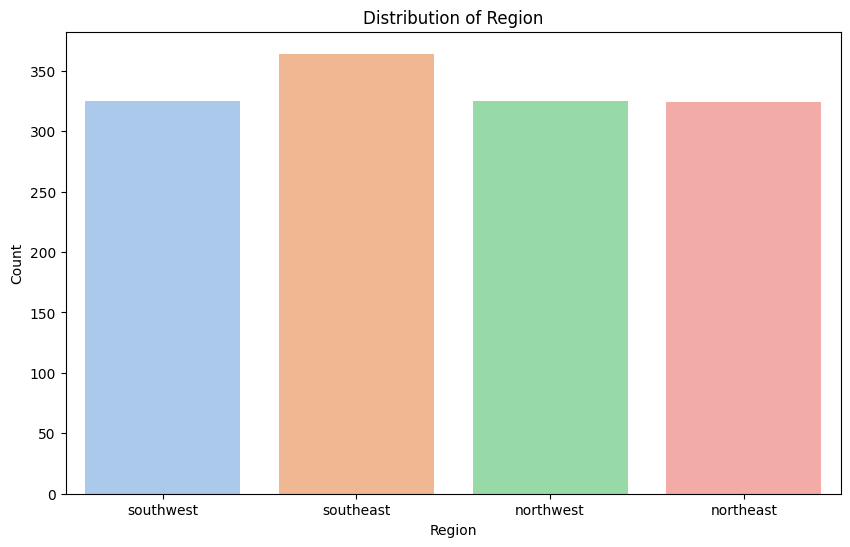

In [ ]:
# plotting the distibution of the 'region' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, palette='pastel')
plt.title('Distribution of Region')
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

## Numerical Feature Distribution

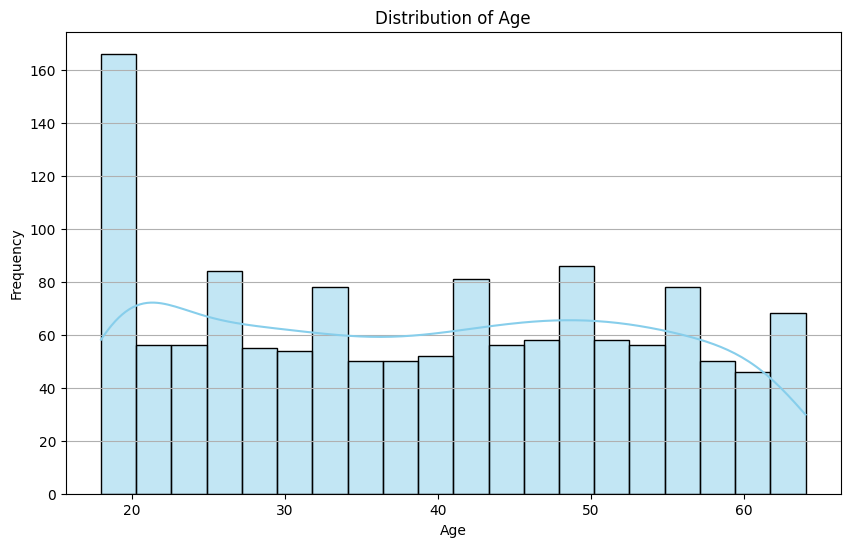

In [ ]:
# plotting the distribution of the 'age' feature
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

## Pairplot Visualization

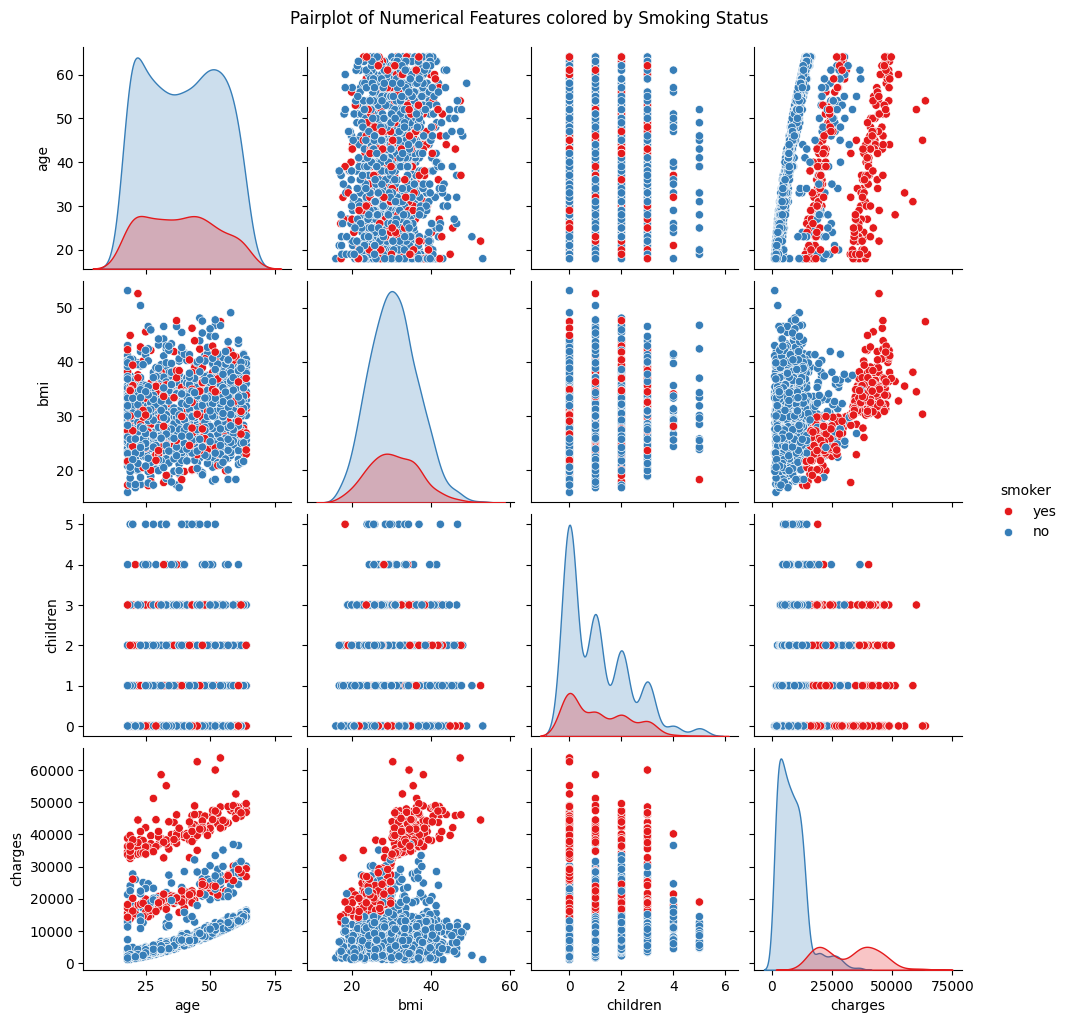

In [ ]:
# creating a pariplot to explore relationship between numerical features
sns.pairplot(df, hue='smoker', palette='Set1', diag_kind='kde')

# display the plot
plt.suptitle('Pairplot of Numerical Features colored by Smoking Status', y=1.02)
plt.show()

## Boxplot Visualizations for Outlier Detection

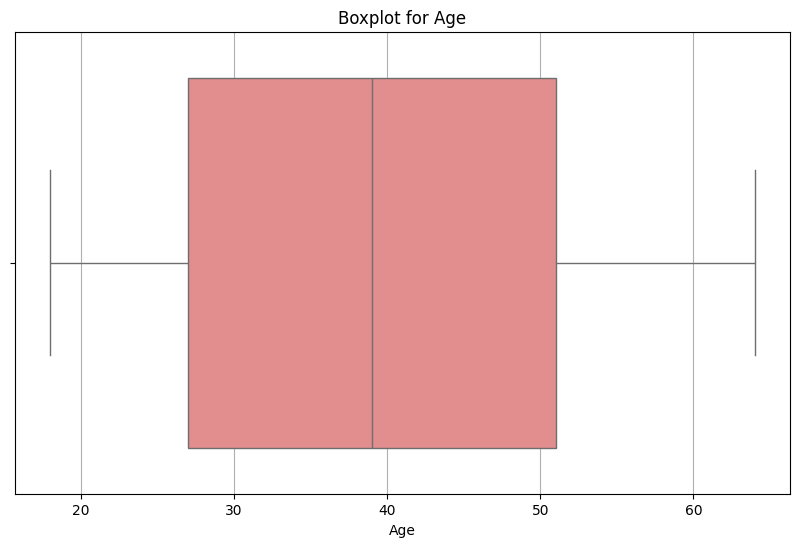

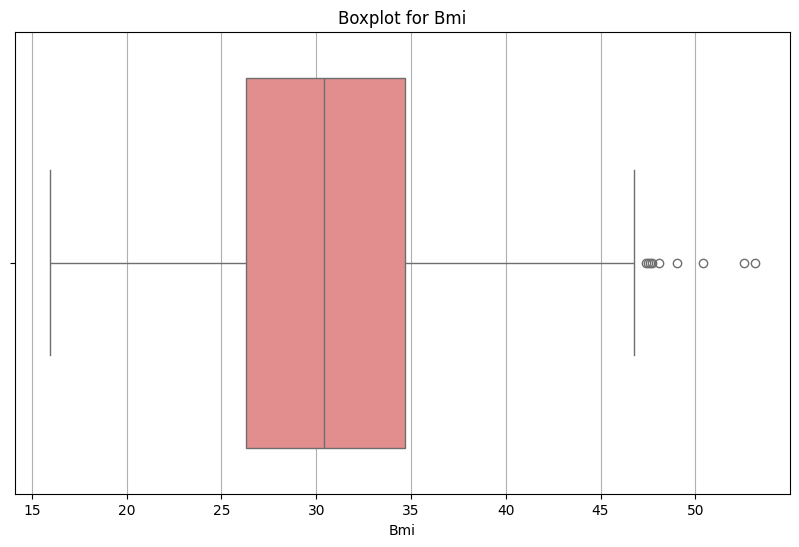

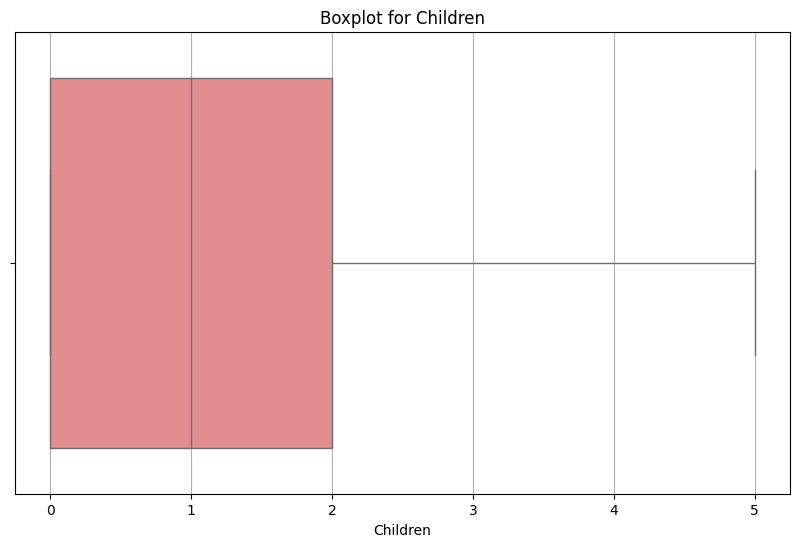

In [ ]:
# list of numerical features
numerical_features = ['age', 'bmi', 'children']

# loop to create boxplots for each numerical features
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=feature, data=df, color='lightcoral')
    plt.title(f'Boxplot for {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.grid(axis='x')
    plt.show()

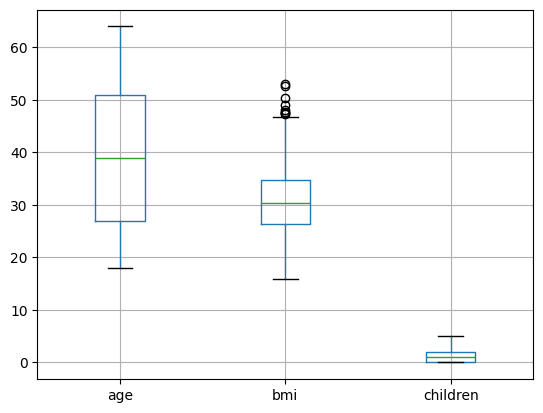

In [ ]:
df.boxplot(numerical_features)
plt.show()

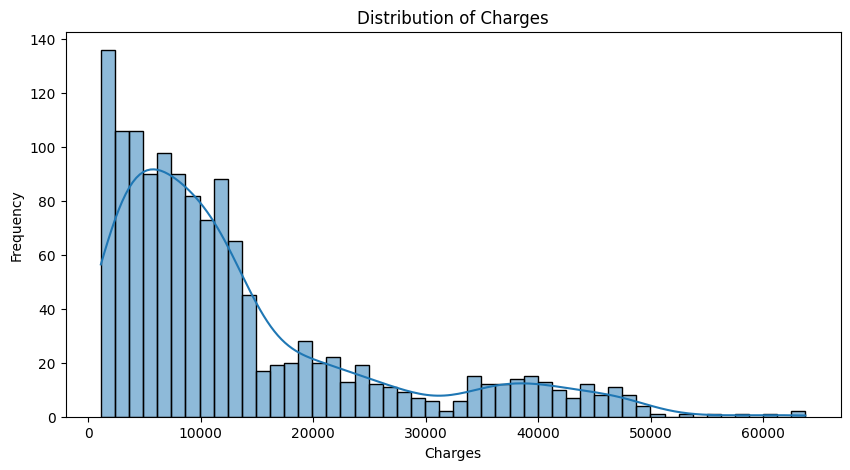

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'charges' is your target variable
plt.figure(figsize=(10,5))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

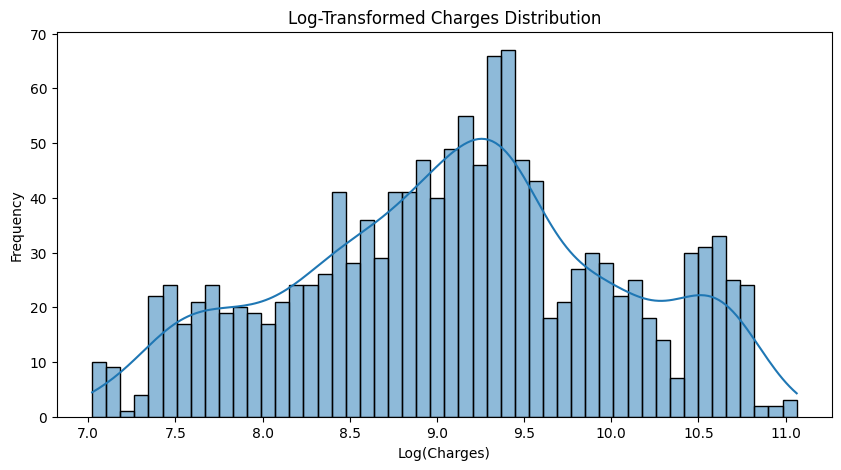

In [ ]:
df['log_charges'] = np.log(df['charges'])

plt.figure(figsize=(10,5))
sns.histplot(df['log_charges'], bins=50, kde=True)
plt.title('Log-Transformed Charges Distribution')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')
plt.show()

## Removing Outliers using IQR

In [ ]:
# calculate the IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# define a function to filter out outliers
def remove_outliers(df, featues):
    # create a mask for rows without outliers
    mask = True
    for feature in numerical_features:
        mask &= (df[feature] >= (Q1[feature] - 1.5 * IQR[feature])) & (df[feature] <= (Q3[feature] + 1.5 * IQR[feature]))
    return df[mask]

# remove outliers from the dataframe
df_cleaned = remove_outliers(df, numerical_features)

# display the cleaned df
print("Original Dataframe Shape:", df.shape)
print("Cleaned Dataframe Shape:", df_cleaned.shape)

Original Dataframe Shape: (1338, 7)
Cleaned Dataframe Shape: (1329, 7)


## Scatter Plot

How does the relationship between age and charges vary by smoking status?

In [ ]:
# interactive scatter plot
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    title='Interactive Scatter Plot of Age vs. Charges Vary by Smoking  Status',
    labels={'age': 'Age',  'charges': 'Charges'},
    hover_name='smoker',
    color_discrete_sequence=['blue', 'red']
)

fig.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Encoding

In [ ]:
# initialize encoder
le = LabelEncoder()

# encode binary categorical features
binary_features = ['sex', 'smoker']
for feature in binary_features:
    df[feature] = le.fit_transform(df[feature])

# encode categorical features with more than two categories
multiclass_features = ['region']
df = pd.get_dummies(df, columns=multiclass_features, drop_first=True)

# display the transformed data
print("\nTransformed DataFrame after Encoding:")
print(df.head())


Transformed DataFrame after Encoding:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [ ]:
df.shape

(1338, 9)

## Feature Scaling & Normalization

In [ ]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [ ]:
# Feature Scaling with StandardScaler
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Feature Scaling with MinMaxScaler
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

In [ ]:
# Display the scaled DataFrames
print("\nStandard Scaled DataFrame:")
df_standard_scaled.head()


Standard Scaled DataFrame:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,False,False,True
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,False,True,False
2,-0.797954,1,0.383307,1.580926,0,4449.46200,False,True,False
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,True,False,False
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,True,False,False


In [ ]:
print("\nMinMax Scaled DataFrame:")
df_minmax_scaled.head()


MinMax Scaled DataFrame:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,16884.92400,False,False,True
1,0.000000,1,0.479150,0.2,0,1725.55230,False,True,False
2,0.217391,1,0.458434,0.6,0,4449.46200,False,True,False
3,0.326087,1,0.181464,0.0,0,21984.47061,True,False,False
4,0.304348,1,0.347592,0.0,0,3866.85520,True,False,False


In [ ]:
df_minmax_scaled.shape

(1338, 9)

In [ ]:
# Apply log transformation to the target
df_log_scaled = df.copy()
df_log_scaled['charges'] = np.log1p(df_log_scaled['charges'])

In [ ]:
df_log_scaled.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,9.734236,False,False,True
1,18,1,33.770,1,0,7.453882,False,True,False
2,28,1,33.000,3,0,8.400763,False,True,False
3,33,1,22.705,0,0,9.998137,True,False,False
4,32,1,28.880,0,0,8.260455,True,False,False


## Feature Selection

In [ ]:
X=df.drop(columns='charges')
y=df['charges']

In [ ]:
# Apply SelectKBest using f_regression
k = 3
select_k_f = SelectKBest(score_func=f_regression, k=k)
X_new_f = select_k_f.fit_transform(X, y)

selected_features_f = X.columns[select_k_f.get_support()]
print(f"Selected features using f_regression: {selected_features_f.tolist()}")

Selected features using f_regression: ['age', 'bmi', 'smoker']


In [ ]:
df_f1 = pd.concat([df_minmax_scaled[selected_features_f], y], axis=1)

In [ ]:
# Apply SelectKBest using mutual_info_regression
select_k_mi = SelectKBest(score_func=mutual_info_regression, k=k)
X_new_mi = select_k_mi.fit_transform(X, y)

selected_features_mi = X.columns[select_k_mi.get_support()]
print(f"Selected features using mutual_info_regression: {selected_features_mi.tolist()}")


Selected features using mutual_info_regression: ['age', 'sex', 'smoker']


In [ ]:
df_f2 = pd.concat([df_minmax_scaled[selected_features_mi], y], axis=1)

In [ ]:
# RFE
estimator = LinearRegression()
rfe = RFE(estimator=estimator, n_features_to_select=3)
X_new_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.get_support()]
print(f"Selected features using RFE: {selected_features_rfe.tolist()}")

Selected features using RFE: ['children', 'smoker', 'region_southeast']


In [ ]:
df_f3 = pd.concat([df_minmax_scaled[selected_features_rfe], y], axis=1)

In [ ]:
# SHAP
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
X=X.astype(float)
model.fit(X, y)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Calculate mean absolute SHAP values for each feature
shap_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='importance', ascending=False)

# Display top-k features
k = 3
top_k_features = shap_importance['feature'].head(k).tolist()
print(f"Top {k} features by SHAP: {top_k_features}")


Top 3 features by SHAP: ['smoker', 'age', 'bmi']


In [ ]:
df_f4 = pd.concat([X[top_k_features], y], axis=1)

# Implementing Active Learning

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_idx = y_true != 0
    return np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100

In [ ]:
def run_active_learning(df, target_col='charges', initial_samples=100, query_size=50, iterations=20):
    # Split into features and target
    X = df_log_scaled.drop(columns=target_col)
    y = df_log_scaled[target_col]

    # Split into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
        "Extra Trees Regressor": ExtraTreesRegressor(n_estimators=100, random_state=42),
        "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
        "Bagging Regressor": BaggingRegressor(n_estimators=10, random_state=42),
        "Ridge Regression": Ridge(alpha=1.0),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Support Vector Regression": SVR(kernel='rbf', C=100, gamma='scale'),
        "Stacked Model": StackingRegressor(
            estimators=[
                ('ridge', Ridge()),
                ('rf', RandomForestRegressor())
            ],
            final_estimator=GradientBoostingRegressor()
        )
    }

    results = {}

    for name, model in models.items():
        print(f"\nRunning Active Learning for {name}")
        # Initial labeled and unlabeled split
        X_labeled = X_train.iloc[:initial_samples].copy()
        y_labeled = y_train.iloc[:initial_samples].copy()
        X_unlabeled = X_train.iloc[initial_samples:].copy()
        y_unlabeled = y_train.iloc[initial_samples:].copy()

        for i in range(iterations):
            model.fit(X_labeled, y_labeled)
            predictions = model.predict(X_unlabeled)

            # Uncertainty sampling: pick samples with highest prediction error
            uncertainty = np.abs(y_unlabeled.values - predictions)
            uncertain_idx = np.argsort(uncertainty)[-query_size:]

            # Move the most uncertain samples from unlabeled to labeled
            X_new = X_unlabeled.iloc[uncertain_idx]
            y_new = y_unlabeled.iloc[uncertain_idx]

            X_labeled = pd.concat([X_labeled, X_new])
            y_labeled = pd.concat([y_labeled, y_new])
            X_unlabeled = X_unlabeled.drop(X_new.index)
            y_unlabeled = y_unlabeled.drop(y_new.index)

            # Evaluate model
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)
            mape = mean_absolute_percentage_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            n, k = X_test.shape
            adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

            print(f"Iteration {i + 1}: MAE = {mae:.3f}, RMSE = {rmse:.3f}, R² = {r2:.3f}, Adjusted R² = {adjusted_r2:.3f}, MAPE = {mape:.2f}%")

        # Final evaluation
        y_pred_final = model.predict(X_test)
        mse_final = mean_squared_error(y_test, y_pred_final)
        rmse_final = np.sqrt(mse_final)
        mae_final = mean_absolute_error(y_test, y_pred_final)
        mape_final = mean_absolute_percentage_error(y_test, y_pred_final)
        r2_final = r2_score(y_test, y_pred_final)
        adjusted_r2_final = 1 - ((1 - r2_final) * (n - 1) / (n - k - 1))

        results[name] = {
            "Final MAE": mae_final,
            "Final RMSE": rmse_final,
            "Final R²": r2_final,
            "Final Adjusted R²": adjusted_r2_final,
            "Final MAPE": mape_final
        }

       # Final summary
    print("\nModel Comparison After Active Learning:")
    for name, metrics in results.items():
        print(f"{name}: Final MAE = {metrics['Final MAE']:.3f}, Final RMSE = {metrics['Final RMSE']:.3f}, "
              f"Final R² = {metrics['Final R²']:.3f}, Final Adjusted R² = {metrics['Final Adjusted R²']:.3f}, Final MAPE = {metrics['Final MAPE']:.2f}%")

    return results


In [ ]:
result=run_active_learning(df)


Running Active Learning for Linear Regression
Iteration 1: MAE = 0.315, RMSE = 0.446, R² = 0.778, Adjusted R² = 0.771, MAPE = 3.57%
Iteration 2: MAE = 0.547, RMSE = 0.644, R² = 0.539, Adjusted R² = 0.524, MAPE = 6.36%
Iteration 3: MAE = 0.428, RMSE = 0.512, R² = 0.708, Adjusted R² = 0.699, MAPE = 4.80%
Iteration 4: MAE = 0.356, RMSE = 0.459, R² = 0.766, Adjusted R² = 0.758, MAPE = 4.07%
Iteration 5: MAE = 0.334, RMSE = 0.445, R² = 0.780, Adjusted R² = 0.773, MAPE = 3.76%
Iteration 6: MAE = 0.331, RMSE = 0.441, R² = 0.784, Adjusted R² = 0.777, MAPE = 3.76%
Iteration 7: MAE = 0.312, RMSE = 0.431, R² = 0.794, Adjusted R² = 0.787, MAPE = 3.51%
Iteration 8: MAE = 0.294, RMSE = 0.423, R² = 0.801, Adjusted R² = 0.795, MAPE = 3.29%
Iteration 9: MAE = 0.285, RMSE = 0.421, R² = 0.803, Adjusted R² = 0.797, MAPE = 3.18%
Iteration 10: MAE = 0.280, RMSE = 0.420, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.13%
Iteration 11: MAE = 0.276, RMSE = 0.419, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.08%
Itera

In [ ]:
result=run_active_learning(df_standard_scaled)


Running Active Learning for Linear Regression
Iteration 1: MAE = 0.315, RMSE = 0.446, R² = 0.778, Adjusted R² = 0.771, MAPE = 3.57%
Iteration 2: MAE = 0.547, RMSE = 0.644, R² = 0.539, Adjusted R² = 0.524, MAPE = 6.36%
Iteration 3: MAE = 0.428, RMSE = 0.512, R² = 0.708, Adjusted R² = 0.699, MAPE = 4.80%
Iteration 4: MAE = 0.356, RMSE = 0.459, R² = 0.766, Adjusted R² = 0.758, MAPE = 4.07%
Iteration 5: MAE = 0.334, RMSE = 0.445, R² = 0.780, Adjusted R² = 0.773, MAPE = 3.76%
Iteration 6: MAE = 0.331, RMSE = 0.441, R² = 0.784, Adjusted R² = 0.777, MAPE = 3.76%
Iteration 7: MAE = 0.312, RMSE = 0.431, R² = 0.794, Adjusted R² = 0.787, MAPE = 3.51%
Iteration 8: MAE = 0.294, RMSE = 0.423, R² = 0.801, Adjusted R² = 0.795, MAPE = 3.29%
Iteration 9: MAE = 0.285, RMSE = 0.421, R² = 0.803, Adjusted R² = 0.797, MAPE = 3.18%
Iteration 10: MAE = 0.280, RMSE = 0.420, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.13%
Iteration 11: MAE = 0.276, RMSE = 0.419, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.08%
Itera

In [ ]:
result=run_active_learning(df_minmax_scaled)


Running Active Learning for Linear Regression
Iteration 1: MAE = 0.315, RMSE = 0.446, R² = 0.778, Adjusted R² = 0.771, MAPE = 3.57%
Iteration 2: MAE = 0.547, RMSE = 0.644, R² = 0.539, Adjusted R² = 0.524, MAPE = 6.36%
Iteration 3: MAE = 0.428, RMSE = 0.512, R² = 0.708, Adjusted R² = 0.699, MAPE = 4.80%
Iteration 4: MAE = 0.356, RMSE = 0.459, R² = 0.766, Adjusted R² = 0.758, MAPE = 4.07%
Iteration 5: MAE = 0.334, RMSE = 0.445, R² = 0.780, Adjusted R² = 0.773, MAPE = 3.76%
Iteration 6: MAE = 0.331, RMSE = 0.441, R² = 0.784, Adjusted R² = 0.777, MAPE = 3.76%
Iteration 7: MAE = 0.312, RMSE = 0.431, R² = 0.794, Adjusted R² = 0.787, MAPE = 3.51%
Iteration 8: MAE = 0.294, RMSE = 0.423, R² = 0.801, Adjusted R² = 0.795, MAPE = 3.29%
Iteration 9: MAE = 0.285, RMSE = 0.421, R² = 0.803, Adjusted R² = 0.797, MAPE = 3.18%
Iteration 10: MAE = 0.280, RMSE = 0.420, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.13%
Iteration 11: MAE = 0.276, RMSE = 0.419, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.08%
Itera

In [ ]:
result=run_active_learning(df_f1)


Running Active Learning for Linear Regression
Iteration 1: MAE = 0.315, RMSE = 0.446, R² = 0.778, Adjusted R² = 0.771, MAPE = 3.57%
Iteration 2: MAE = 0.547, RMSE = 0.644, R² = 0.539, Adjusted R² = 0.524, MAPE = 6.36%
Iteration 3: MAE = 0.428, RMSE = 0.512, R² = 0.708, Adjusted R² = 0.699, MAPE = 4.80%
Iteration 4: MAE = 0.356, RMSE = 0.459, R² = 0.766, Adjusted R² = 0.758, MAPE = 4.07%
Iteration 5: MAE = 0.334, RMSE = 0.445, R² = 0.780, Adjusted R² = 0.773, MAPE = 3.76%
Iteration 6: MAE = 0.331, RMSE = 0.441, R² = 0.784, Adjusted R² = 0.777, MAPE = 3.76%
Iteration 7: MAE = 0.312, RMSE = 0.431, R² = 0.794, Adjusted R² = 0.787, MAPE = 3.51%
Iteration 8: MAE = 0.294, RMSE = 0.423, R² = 0.801, Adjusted R² = 0.795, MAPE = 3.29%
Iteration 9: MAE = 0.285, RMSE = 0.421, R² = 0.803, Adjusted R² = 0.797, MAPE = 3.18%
Iteration 10: MAE = 0.280, RMSE = 0.420, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.13%
Iteration 11: MAE = 0.276, RMSE = 0.419, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.08%
Itera

In [ ]:
result=run_active_learning(df_f2)


Running Active Learning for Linear Regression
Iteration 1: MAE = 0.315, RMSE = 0.446, R² = 0.778, Adjusted R² = 0.771, MAPE = 3.57%
Iteration 2: MAE = 0.547, RMSE = 0.644, R² = 0.539, Adjusted R² = 0.524, MAPE = 6.36%
Iteration 3: MAE = 0.428, RMSE = 0.512, R² = 0.708, Adjusted R² = 0.699, MAPE = 4.80%
Iteration 4: MAE = 0.356, RMSE = 0.459, R² = 0.766, Adjusted R² = 0.758, MAPE = 4.07%
Iteration 5: MAE = 0.334, RMSE = 0.445, R² = 0.780, Adjusted R² = 0.773, MAPE = 3.76%
Iteration 6: MAE = 0.331, RMSE = 0.441, R² = 0.784, Adjusted R² = 0.777, MAPE = 3.76%
Iteration 7: MAE = 0.312, RMSE = 0.431, R² = 0.794, Adjusted R² = 0.787, MAPE = 3.51%
Iteration 8: MAE = 0.294, RMSE = 0.423, R² = 0.801, Adjusted R² = 0.795, MAPE = 3.29%
Iteration 9: MAE = 0.285, RMSE = 0.421, R² = 0.803, Adjusted R² = 0.797, MAPE = 3.18%
Iteration 10: MAE = 0.280, RMSE = 0.420, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.13%
Iteration 11: MAE = 0.276, RMSE = 0.419, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.08%
Itera

In [ ]:
result=run_active_learning(df_f3)


Running Active Learning for Linear Regression
Iteration 1: MAE = 0.315, RMSE = 0.446, R² = 0.778, Adjusted R² = 0.771, MAPE = 3.57%
Iteration 2: MAE = 0.547, RMSE = 0.644, R² = 0.539, Adjusted R² = 0.524, MAPE = 6.36%
Iteration 3: MAE = 0.428, RMSE = 0.512, R² = 0.708, Adjusted R² = 0.699, MAPE = 4.80%
Iteration 4: MAE = 0.356, RMSE = 0.459, R² = 0.766, Adjusted R² = 0.758, MAPE = 4.07%
Iteration 5: MAE = 0.334, RMSE = 0.445, R² = 0.780, Adjusted R² = 0.773, MAPE = 3.76%
Iteration 6: MAE = 0.331, RMSE = 0.441, R² = 0.784, Adjusted R² = 0.777, MAPE = 3.76%
Iteration 7: MAE = 0.312, RMSE = 0.431, R² = 0.794, Adjusted R² = 0.787, MAPE = 3.51%
Iteration 8: MAE = 0.294, RMSE = 0.423, R² = 0.801, Adjusted R² = 0.795, MAPE = 3.29%
Iteration 9: MAE = 0.285, RMSE = 0.421, R² = 0.803, Adjusted R² = 0.797, MAPE = 3.18%
Iteration 10: MAE = 0.280, RMSE = 0.420, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.13%
Iteration 11: MAE = 0.276, RMSE = 0.419, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.08%
Itera

In [ ]:
result=run_active_learning(df_f4)


Running Active Learning for Linear Regression
Iteration 1: MAE = 0.315, RMSE = 0.446, R² = 0.778, Adjusted R² = 0.771, MAPE = 3.57%
Iteration 2: MAE = 0.547, RMSE = 0.644, R² = 0.539, Adjusted R² = 0.524, MAPE = 6.36%
Iteration 3: MAE = 0.428, RMSE = 0.512, R² = 0.708, Adjusted R² = 0.699, MAPE = 4.80%
Iteration 4: MAE = 0.356, RMSE = 0.459, R² = 0.766, Adjusted R² = 0.758, MAPE = 4.07%
Iteration 5: MAE = 0.334, RMSE = 0.445, R² = 0.780, Adjusted R² = 0.773, MAPE = 3.76%
Iteration 6: MAE = 0.331, RMSE = 0.441, R² = 0.784, Adjusted R² = 0.777, MAPE = 3.76%
Iteration 7: MAE = 0.312, RMSE = 0.431, R² = 0.794, Adjusted R² = 0.787, MAPE = 3.51%
Iteration 8: MAE = 0.294, RMSE = 0.423, R² = 0.801, Adjusted R² = 0.795, MAPE = 3.29%
Iteration 9: MAE = 0.285, RMSE = 0.421, R² = 0.803, Adjusted R² = 0.797, MAPE = 3.18%
Iteration 10: MAE = 0.280, RMSE = 0.420, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.13%
Iteration 11: MAE = 0.276, RMSE = 0.419, R² = 0.804, Adjusted R² = 0.798, MAPE = 3.08%
Itera